# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from config import api_key
from api_keys import weather_api_key
from pprint import pprint
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
key=weather_api_key


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

580
['sibolga', 'lebu', 'nanortalik', 'saint-philippe', 'bowen', 'ushuaia', 'castro', 'toora-khem', 'bambous virieux', 'thompson', 'taolanaro', 'carnarvon', 'praia', 'souillac', 'tasiilaq', 'cap malheureux', 'isiolo', 'puerto ayora', 'guerrero negro', 'ondorhaan', 'cape town', 'jomalig', 'kokoda', 'chokurdakh', 'fortuna', 'qaanaaq', 'rikitea', 'padang', 'albany', 'ust-kuyga', 'mataura', 'narsaq', 'cidreira', 'marcona', 'east london', 'kuche', 'hermanus', 'iqaluit', 'inta', 'hobart', 'taoudenni', 'vaini', 'new norfolk', 'busselton', 'barentsburg', 'punta arenas', 'kualakapuas', 'sao filipe', 'georgetown', 'grand river south east', 'tahta', 'ulaanbaatar', 'clarence town', 'jamestown', 'the valley', 'lagos', 'husavik', 'mendota', 'pevek', 'batagay', 'butaritari', 'bredasdorp', 'port alfred', 'bethel', 'tachi', 'henzada', 'hami', 'barrow', 'coahuayana', 'blora', 'college', 'cabo san lucas', 'hilo', 'sarangani', 'kaitangata', 'aflu', 'lulea', 'esperance', 'wagar', 'grindavik', 'oranjemund',

In [4]:
#lists for different descriptors
City = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
maxTemp = []
windspeed = []
index = 0
counter = 1




### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
url="http://api.openweathermap.org/data/2.5/weather?"
units='imperial'
qurl = f"{url}appid={key}&units={units}&q="
#qurl=url + "appid="+key+"&q="
print(qurl)

http://api.openweathermap.org/data/2.5/weather?appid=2dc0ee36740f5fce1c2181013faae54b&units=imperial&q=


In [6]:
# For each city name in cities list

print('Finding cities')
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(qurl + city).json()
        City.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        maxTemp.append(response['main']['temp_max'])
        windspeed.append(response["wind"]["speed"])
        if index > 49:
            index = 0
            counter = counter + 1
    
        else:
            index = index + 1
            
        print(f"Retrieving City number {counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")


print("Complete")


Finding cities
Retrieving City number 1 : sibolga
Retrieving City number 1 : lebu
Retrieving City number 1 : nanortalik
Retrieving City number 1 : saint-philippe
Retrieving City number 1 : bowen
Retrieving City number 1 : ushuaia
Retrieving City number 1 : castro
Retrieving City number 1 : toora-khem
Retrieving City number 1 : bambous virieux
Retrieving City number 1 : thompson
City not found. Skipping...
Retrieving City number 1 : carnarvon
Retrieving City number 1 : praia
Retrieving City number 1 : souillac
Retrieving City number 1 : tasiilaq
Retrieving City number 1 : cap malheureux
Retrieving City number 1 : isiolo
Retrieving City number 1 : puerto ayora
Retrieving City number 1 : guerrero negro
City not found. Skipping...
Retrieving City number 1 : cape town
City not found. Skipping...
Retrieving City number 1 : kokoda
Retrieving City number 1 : chokurdakh
Retrieving City number 1 : fortuna
Retrieving City number 1 : qaanaaq
Retrieving City number 1 : rikitea
Retrieving City numbe

Retrieving City number 165 : polignano a mare
Retrieving City number 166 : islahiye
Retrieving City number 167 : nchelenge
Retrieving City number 168 : norman wells
Retrieving City number 169 : kassala
Retrieving City number 170 : samarai
Retrieving City number 171 : plan-les-ouates
Retrieving City number 172 : vila velha
Retrieving City number 173 : riberalta
Retrieving City number 174 : saint-jerome
Retrieving City number 175 : thabazimbi
City not found. Skipping...
City not found. Skipping...
Retrieving City number 176 : mutoko
Retrieving City number 177 : pacific grove
Retrieving City number 178 : santa maria
Retrieving City number 179 : haines junction
City not found. Skipping...
Retrieving City number 180 : springbok
Retrieving City number 181 : hoquiam
Retrieving City number 182 : inhambane
Retrieving City number 183 : marsh harbour
Retrieving City number 184 : severo-kurilsk
City not found. Skipping...
Retrieving City number 185 : richards bay
Retrieving City number 186 : sal r

Retrieving City number 368 : biak
Retrieving City number 369 : yulara
Retrieving City number 370 : keetmanshoop
Retrieving City number 371 : port blair
Retrieving City number 372 : dicabisagan
Retrieving City number 373 : abha
Retrieving City number 374 : killybegs
Retrieving City number 375 : presidencia roque saenz pena
Retrieving City number 376 : bata
Retrieving City number 377 : stralsund
Retrieving City number 378 : kudowa-zdroj
Retrieving City number 379 : marsala
Retrieving City number 380 : la ronge
City not found. Skipping...
Retrieving City number 381 : darnah
Retrieving City number 382 : sinnar
Retrieving City number 383 : saint pete beach
Retrieving City number 384 : jidong
Retrieving City number 385 : ust-omchug
Retrieving City number 386 : korem
Retrieving City number 387 : mudon
Retrieving City number 388 : piacabucu
City not found. Skipping...
Retrieving City number 389 : ballina
Retrieving City number 390 : anadyr
Retrieving City number 391 : bodden town
Retrieving Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#DF then CSV
weatherDF = pd.DataFrame({ 
                "City" : City,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Latitude" : lat,
                "Longitude" : lon,
                "Max Temp" : maxTemp,
                "Wind Speed" : windspeed})
    
weatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Sibolga,25,ID,1627418786,91,1.7427,98.7792,76.17,2.59
1,Lebu,0,CL,1627418401,74,-37.6167,-73.6500,48.63,24.29
2,Nanortalik,57,GL,1627418410,75,60.1432,-45.2371,47.07,3.47
3,Saint-Philippe,48,RE,1627418341,82,-21.3585,55.7679,69.35,13.00
4,Bowen,63,AU,1627418926,83,-20.0167,148.2333,50.22,7.76


In [8]:
weatherDF.to_csv("../output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weatherDF[weatherDF['Humidity']>=100]
#no rows have greater humidity than 100%, but it is possible

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
21,Fortuna,90,US,1627418336,100,40.5982,-124.1573,83.19,0.00
22,Qaanaaq,100,GL,1627418827,100,77.4840,-69.3632,40.86,3.94
136,Krivodanovka,92,RU,1627418958,100,55.0881,82.6551,48.29,2.24
183,Nhulunbuy,40,AU,1627418970,100,-12.2333,136.7667,68.61,0.00
312,Dikson,100,RU,1627419014,100,73.5069,80.5464,40.69,15.93
368,Pontianak,75,ID,1627419034,100,-0.0333,109.3333,78.78,2.30
431,Anadyr,75,RU,1627419058,100,64.7500,177.4833,52.30,4.00
503,Vestmanna,90,FO,1627419088,100,62.1564,-7.1664,50.92,12.66
530,Mildura,90,AU,1627419098,100,-34.2000,142.1500,55.36,5.75


In [10]:
#  Get the indices of cities that have humidity over 100%.
# No rows have more than 100% humidity-see above

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#see above


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

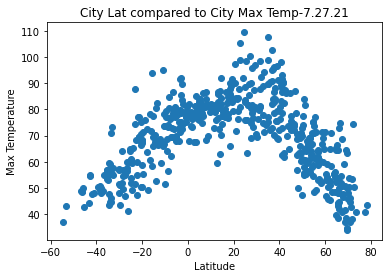

In [12]:
Lat = weatherDF['Latitude']
Temp = weatherDF['Max Temp']

plt.scatter(Lat,Temp)
plt.title('City Lat compared to City Max Temp-7.27.21')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig('../Images/ScatterPlotTempLat.png')
plt.show()

## Latitude vs. Humidity Plot

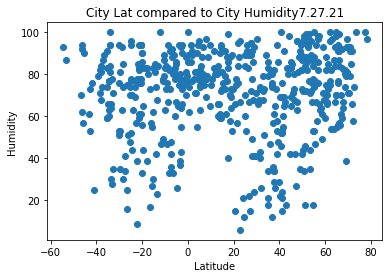

In [13]:
Lat = weatherDF['Latitude']
Hum = weatherDF['Humidity']

plt.scatter(Lat,Hum)
plt.title('City Lat compared to City Humidity7.27.21')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../Images/ScatterPlotHumLat.png')
plt.show()

## Latitude vs. Cloudiness Plot

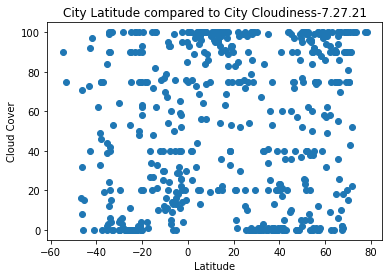

In [14]:
Lat = weatherDF['Latitude']
Cld = weatherDF['Cloudiness']

plt.scatter(Lat,Cld)
plt.title('City Latitude compared to City Cloudiness-7.27.21')
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover')
plt.savefig('../Images/ScatterPlotCldLat.png')
plt.show()

## Latitude vs. Wind Speed Plot

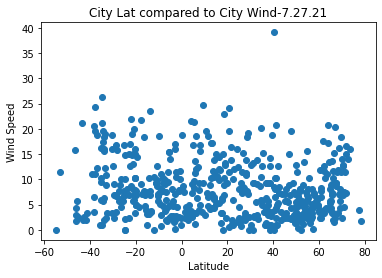

In [15]:
Lat = weatherDF['Latitude']
Wind = weatherDF['Wind Speed']

plt.scatter(Lat,Wind)
plt.title('City Lat compared to City Wind-7.27.21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('../Images/ScatterPlotWindLat.png')
plt.show()

## Linear Regression

In [16]:
# This makes two dataframes, one for at or over the equator and one for lower, then there is the function for linear regression
NHemi = weatherDF[weatherDF['Latitude']>=0]
SHemi = weatherDF[weatherDF['Latitude']<0]
def plot_linear_regression(x, y, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=12,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6865013400092386


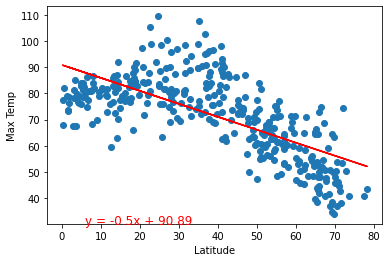

<Figure size 432x288 with 0 Axes>

In [17]:
#This compares the max temp and latitutde of cities in the northern hemisphere, 
#it shows a negative correlation meaning that as the latitude increases the max tempurature decreases, the strength of correlation
#is fairly strong
x = NHemi["Latitude"]
y = NHemi["Max Temp"]
plot_linear_regression(x,y,'Max Temp',(6,30))

plt.savefig('../Images/NHTempLat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7947816573331249


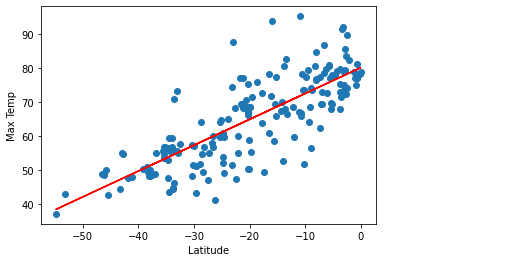

<Figure size 432x288 with 0 Axes>

In [18]:
#This compares the max temp and latitutde of cities in the southern hemisphere, 
#it shows a positive correlation meaning that as the latitude increases towards 0 the max tempurature also increases.  
#The strength of
#correlation is fairly strong, stronger than the negative correlatoin shown in the above plot
x = SHemi["Latitude"]
y = SHemi["Max Temp"]
plot_linear_regression(x,y,'Max Temp',(6,30))

plt.savefig('../Images/SHTempLat')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0514085625959639


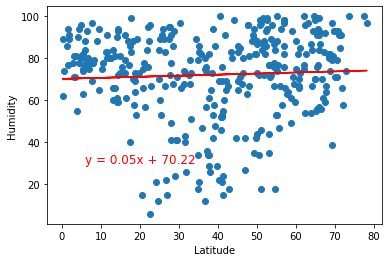

<Figure size 432x288 with 0 Axes>

In [19]:
#This plot shows minimal correlation between humidity and latitude
x = NHemi["Latitude"]
y = NHemi["Humidity"]
plot_linear_regression(x,y,'Humidity',(6,30))

plt.savefig('../Images/NHHumLat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.017609132814036466


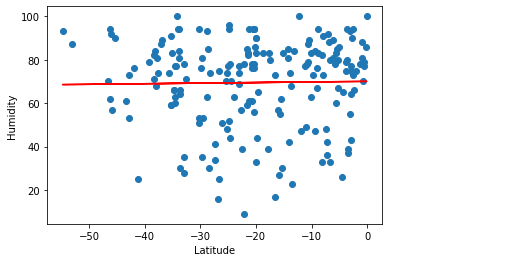

<Figure size 432x288 with 0 Axes>

In [20]:
#This plot shows minimal, almost 0, correlation between humidity and latitude
x = SHemi["Latitude"]
y = SHemi["Humidity"]
plot_linear_regression(x,y,'Humidity',(6,30))

plt.savefig('../Images/SHHumLat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.058347480725072405


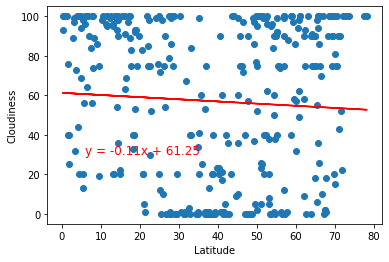

<Figure size 432x288 with 0 Axes>

In [21]:
#This plot shows minimal negative correlation between cloudiness and latitude
x = NHemi["Latitude"]
y = NHemi["Cloudiness"]
plot_linear_regression(x,y,'Cloudiness',(6,30))

plt.savefig('../Images/NHCldLat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028243098270680687


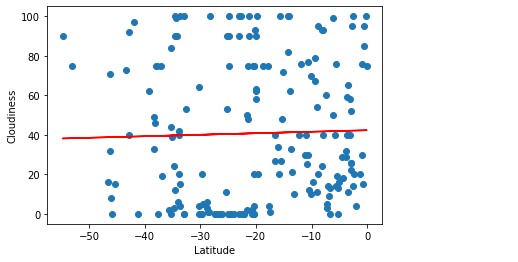

<Figure size 432x288 with 0 Axes>

In [22]:
#This plot shows minimal correlation between cloudiness and latitude
x = SHemi["Latitude"]
y = SHemi["Cloudiness"]
plot_linear_regression(x,y,'Cloudiness',(6,30))

plt.savefig('../Images/SHCldLat')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09281528693998022


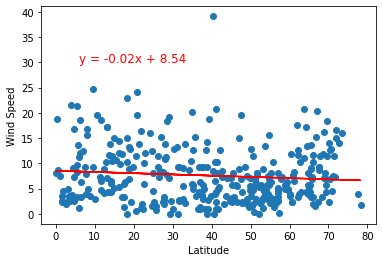

<Figure size 432x288 with 0 Axes>

In [23]:
#This plot shows minimal negative correlation between wind speed and latitude
x = NHemi["Latitude"]
y = NHemi["Wind Speed"]
plot_linear_regression(x,y,'Wind Speed',(6,30))

plt.savefig('../Images/NHWindLat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.18958631532764916


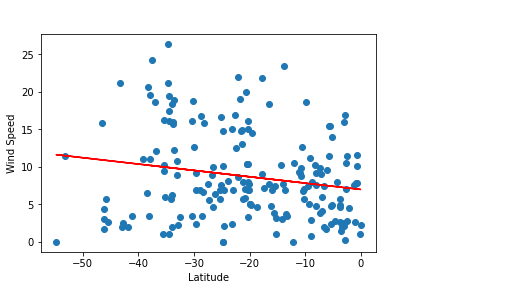

<Figure size 432x288 with 0 Axes>

In [24]:
#This plot shows minimal negative correlation between windspeed and latitude
x = SHemi["Latitude"]
y = SHemi["Wind Speed"]
plot_linear_regression(x,y,'Wind Speed',(6,30))

plt.savefig('../Images/SHWindLat')